# Import Libraries

In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Get the data
- Downloading data from git user
- IRIS flower dataset:
- Features:
   - Sepal length (cm)
   - Sepal width (cm)
   - Petal length (cm)
   - Petal width (cm)
- Classes :  three species of the iris flower
    - Setosa
    - Versicolor
    - Virginica

In [3]:
# IMPORT DATA
data_url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(data_url)

# Label the Classes

In [4]:
#rename last column class to 0,1,2
data['variety'] = data['variety'].replace('Setosa',0)
data['variety'] = data['variety'].replace('Versicolor',1)
data['variety'] = data['variety'].replace('Virginica',2)

C:\Users\user\AppData\Local\Temp\ipykernel_7700\2806346151.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['variety'] = data['variety'].replace('Virginica',2)


# Splitting data into test and train dataset

In [5]:
# splitting data in X , y and converting DatFrame into np array
X = data.iloc[:,:-1].to_numpy()
y = data.iloc[:,-1].to_numpy()

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

#converting numpy array to torch for PYTORCH
# Now convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)  # Features (float32 for most ML models)
X_test = torch.tensor(X_test, dtype=torch.float32)  # Features (float32 for most ML models)

y_train = torch.tensor(y_train, dtype=torch.long)     # Target labels (long for classification)
y_test = torch.tensor(y_test, dtype=torch.long)     # Target labels (long for classification)

# Neural Network Architecture
- Consist of:
  - 2 Fully Connected linear NN layers
  - Followed by Rectified Linear Units
    - ReLU transforms the input to the neuron based on a simple rule:
    - If the input is positive, ReLU outputs the input.
    - If the input is negative or zero, ReLU outputs zero.

In [6]:
#features = 4 so i/p =4
#o/p (0,1,2) = 3
class simple(nn.Module):
    def __init__(self):
        super(simple,self).__init__()
        self.fc1 = nn.Linear(4,8)
        self.fc2 = nn.Linear(8,16)
        self.out = nn.Linear(16,3)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

# Model instance 
- Get the model function
- Apply Optimizer
- Specify parameters

In [7]:
# Create an instance of model
model = simple()

# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Hyperparameter 
num_epochs = 100
losses = []

# Train the model over num of epochs

In [8]:
#Train the model! 
for i in range(num_epochs):
    y_pred = model.forward(X_train) # Get predicted results
    loss = criterion(y_pred,y_train)  # predicted values vs the y_train
    losses.append(loss.detach().numpy()) # Keep Track of our losses

    #FOR BACKWARD FLOW
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Print model traing at each epoch
    if i % 10 == 0:
        print(f"Epoch: {i} and Loss: {loss}")

Epoch: 0 and Loss: 1.2042065858840942
Epoch: 10 and Loss: 1.0875896215438843
Epoch: 20 and Loss: 1.0142500400543213
Epoch: 30 and Loss: 0.8524582982063293
Epoch: 40 and Loss: 0.7109119296073914
Epoch: 50 and Loss: 0.5291529297828674
Epoch: 60 and Loss: 0.3346838355064392
Epoch: 70 and Loss: 0.17069730162620544
Epoch: 80 and Loss: 0.09177954494953156
Epoch: 90 and Loss: 0.06909859925508499


# Plot learning: Num of epoch increases loss decreases

Text(0.5, 0, 'Num_epochs')

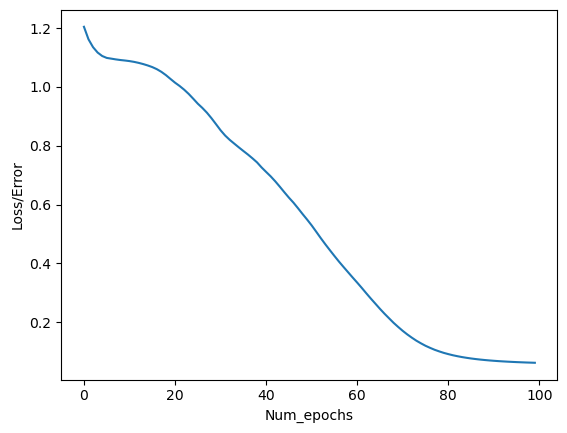

In [9]:
plt.plot(range(num_epochs),losses)
plt.ylabel("Loss/Error")
plt.xlabel("Num_epochs")

# Test the model

In [10]:
#Testing 20% test data with no_grad , 
#enumerate numerate all data with index called i strating from 0, 
#model.forward tests data and store predictions into y_val
correct = 0
with torch.no_grad():
    for i , data in enumerate(X_test):
        y_val = model.forward(data)
        #y_val returns a tensor of probability of being class 0 , 1 , 2 like [-1.3679,  3.3345, -0.4461]
        #.argmax() calculate max value from tensor to make it single tensor with max value [3.3345]
        #.item() indicates scalar index value which is here (max value lies at index 1) 1 
        if y_val.argmax().item() == y_test[i]:
            correct+=1
            
        print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
        print(f'We got {correct} correct!')

1.)  tensor([-2.1851,  6.1408,  1.6745]) 	 1 	 1
We got 1 correct!
2.)  tensor([ 11.1582,   4.9726, -12.9089]) 	 0 	 0
We got 2 correct!
3.)  tensor([-14.3218,   4.5697,  16.6671]) 	 2 	 2
We got 3 correct!
4.)  tensor([-3.0548,  5.9917,  2.7556]) 	 1 	 1
We got 4 correct!
5.)  tensor([-2.5273,  6.5917,  1.9871]) 	 1 	 1
We got 5 correct!
6.)  tensor([ 10.3616,   4.7024, -11.9836]) 	 0 	 0
We got 6 correct!
7.)  tensor([ 0.5150,  5.9293, -1.4820]) 	 1 	 1
We got 7 correct!
8.)  tensor([-7.9075,  5.7760,  8.6646]) 	 2 	 2
We got 8 correct!
9.)  tensor([-4.5732,  5.3671,  4.6820]) 	 1 	 1
We got 9 correct!
10.)  tensor([-0.0919,  6.0411, -0.8091]) 	 1 	 1
We got 10 correct!
11.)  tensor([-6.5932,  5.7977,  7.0846]) 	 2 	 2
We got 11 correct!
12.)  tensor([  9.8329,   4.2355, -11.3936]) 	 0 	 0
We got 12 correct!
13.)  tensor([ 11.2251,   4.8286, -13.0057]) 	 0 	 0
We got 13 correct!
14.)  tensor([  9.9625,   4.2983, -11.5411]) 	 0 	 0
We got 14 correct!
15.)  tensor([ 10.7500,   4.6509, 

# TESTING on random values
- As data needs 4 features
- Test on random fearures value

In [15]:
new_iris = torch.tensor([1.0,-9.0,-3.4,-9.3])
with torch.no_grad():
    output = model(new_iris)
    out_class = output.argmax().item()
    if out_class==0:
        print("It's Setosa!")
    elif out_class==1:
        print("It's Versicolor!")
    else:
        print("It's Virginica!")

It's Setosa!


# TO SAVE THIS MODEL

In [21]:
# save model with specifying path
path = "../my_models/iris_nn.pth"
torch.save(model.state_dict(), path)

# Load the Saved Model

In [22]:
# As path already holds name of model 
new_model = simple()
new_model.load_state_dict(torch.load(path))

C:\Users\user\AppData\Local\Temp\ipykernel_7700\2000243150.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load(path))


<All keys matched successfully>

# Evaluation mode
- Evaluation mode ensures that layers like dropout and batch normalization function correctly during inference.
- Without it, these layers may behave inappropriately, leading to inconsistent results.

In [23]:
model.eval()

simple(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)